# 🦾 Robot Navigation in Dynamic 3D Environments

**About this dataset:**

This dataset is for evaluating and optimizing pathfinding algorithms for robot navigation in dynamic 3D environments. The dataset includes key features such as start and destination positions, obstacle data, and various performance metrics. These features are designed to simulate real-world conditions where robots navigate complex environments filled with both static and dynamic obstacles.

# **A. Dataset Loading**

## **Import Libraries**

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report

## **Loading dataset**

In [ ]:
data = pd.read_csv('pathfinding_robot_navigation_dataset.csv')

In [ ]:
data.head()

,Start Position (X),Start Position (Y),Start Position (Z),Destination Position (X),Destination Position (Y),Destination Position (Z),Static Object Count,Dynamic Object Count,Obstacle Position (X),Obstacle Position (Y),...,Path Length (m),Obstacle Height (m),Obstacle Width (m),Obstacle Depth (m),Energy Efficiency (%),Collision Avoidance Rate (%),Daily Success Rate (%),Computation Time (ms),Pathfinding Algorithm,Pathfinding Success
0,9.972256,3.946703,1.230006,7.352936,13.875176,7.274163,0,3,13.542459,7.286382,...,24.746604,1.227811,1.292839,1.929440,94.311085,98.360442,86.566406,198,MABC,1
1,8.556765,2.288472,3.747037,10.733650,14.826779,7.480710,7,0,0.129521,11.713234,...,19.183102,1.296789,1.319699,2.509552,89.239395,94.510858,75.652148,176,MABC,1
2,9.463719,1.985050,2.882703,9.551352,6.801690,6.816892,1,0,17.522477,6.533118,...,17.528709,4.619934,1.931463,1.381383,81.976929,91.931427,92.462535,192,MABC,1
3,1.920636,1.930737,0.390695,8.253524,12.912660,7.305569,6,2,1.306424,19.877763,...,8.034678,4.410975,2.440395,1.354305,74.723074,89.995303,94.678589,193,MABC,0
4,5.292077,3.966651,2.446594,12.307908,8.365420,7.991248,2,3,11.593753,15.563527,...,28.672794,4.790975,1.768602,2.790824,71.014419,90.050552,91.301828,199,MABC,0


In [ ]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Start Position (X)            1000 non-null   float64
 1   Start Position (Y)            1000 non-null   float64
 2   Start Position (Z)            1000 non-null   float64
 3   Destination Position (X)      1000 non-null   float64
 4   Destination Position (Y)      1000 non-null   float64
 5   Destination Position (Z)      1000 non-null   float64
 6   Static Object Count           1000 non-null   int64  
 7   Dynamic Object Count          1000 non-null   int64  
 8   Obstacle Position (X)         1000 non-null   float64
 9   Obstacle Position (Y)         1000 non-null   float64
 10  Obstacle Position (Z)         1000 non-null   float64
 11  Obstacle Velocity (X)         1000 non-null   float64
 12  Obstacle Velocity (Y)         1000 non-null   float64
 13  Obst

None

# **B. Preprocessing**

## **Removing Duplicates**

In [ ]:
data = data.drop_duplicates()

## **One-Hot Encoding**

In [ ]:
categorical_cols = ['Pathfinding Algorithm']
encoded = pd.get_dummies(data[categorical_cols], dtype=int)

In [ ]:
data = data.drop(columns=categorical_cols)
idx = data.columns.get_loc('Computation Time (ms)') + 1
data = pd.concat([data.iloc[:, :idx], encoded, data.iloc[:, idx:]], axis=1)
data.head()

,Start Position (X),Start Position (Y),Start Position (Z),Destination Position (X),Destination Position (Y),Destination Position (Z),Static Object Count,Dynamic Object Count,Obstacle Position (X),Obstacle Position (Y),...,Obstacle Height (m),Obstacle Width (m),Obstacle Depth (m),Energy Efficiency (%),Collision Avoidance Rate (%),Daily Success Rate (%),Computation Time (ms),Pathfinding Algorithm_ABC,Pathfinding Algorithm_MABC,Pathfinding Success
0,9.972256,3.946703,1.230006,7.352936,13.875176,7.274163,0,3,13.542459,7.286382,...,1.227811,1.292839,1.929440,94.311085,98.360442,86.566406,198,0,1,1
1,8.556765,2.288472,3.747037,10.733650,14.826779,7.480710,7,0,0.129521,11.713234,...,1.296789,1.319699,2.509552,89.239395,94.510858,75.652148,176,0,1,1
2,9.463719,1.985050,2.882703,9.551352,6.801690,6.816892,1,0,17.522477,6.533118,...,4.619934,1.931463,1.381383,81.976929,91.931427,92.462535,192,0,1,1
3,1.920636,1.930737,0.390695,8.253524,12.912660,7.305569,6,2,1.306424,19.877763,...,4.410975,2.440395,1.354305,74.723074,89.995303,94.678589,193,0,1,0
4,5.292077,3.966651,2.446594,12.307908,8.365420,7.991248,2,3,11.593753,15.563527,...,4.790975,1.768602,2.790824,71.014419,90.050552,91.301828,199,0,1,0


## **Getting the inputs and output**

### **Independent Variables**

In [ ]:
X = data[['Start Position (X)', 'Start Position (Y)', 'Start Position (Z)',
          'Destination Position (X)', 'Destination Position (Y)', 'Destination Position (Z)',
          'Static Object Count', 'Dynamic Object Count', 'Obstacle Position (X)',
          'Obstacle Position (Y)', 'Obstacle Position (Z)', 'Obstacle Velocity (X)',
          'Obstacle Velocity (Y)', 'Obstacle Velocity (Z)', 'Path Length (m)',
          'Obstacle Height (m)', 'Obstacle Width (m)', 'Obstacle Depth (m)',
          'Energy Efficiency (%)', 'Collision Avoidance Rate (%)','Computation Time (ms)',
          'Pathfinding Algorithm_ABC', 'Pathfinding Algorithm_MABC']]

X

,Start Position (X),Start Position (Y),Start Position (Z),Destination Position (X),Destination Position (Y),Destination Position (Z),Static Object Count,Dynamic Object Count,Obstacle Position (X),Obstacle Position (Y),...,Obstacle Velocity (Z),Path Length (m),Obstacle Height (m),Obstacle Width (m),Obstacle Depth (m),Energy Efficiency (%),Collision Avoidance Rate (%),Computation Time (ms),Pathfinding Algorithm_ABC,Pathfinding Algorithm_MABC
0,9.972256,3.946703,1.230006,7.352936,13.875176,7.274163,0,3,13.542459,7.286382,...,0.491304,24.746604,1.227811,1.292839,1.929440,94.311085,98.360442,198,0,1
1,8.556765,2.288472,3.747037,10.733650,14.826779,7.480710,7,0,0.129521,11.713234,...,0.147427,19.183102,1.296789,1.319699,2.509552,89.239395,94.510858,176,0,1
2,9.463719,1.985050,2.882703,9.551352,6.801690,6.816892,1,0,17.522477,6.533118,...,0.895523,17.528709,4.619934,1.931463,1.381383,81.976929,91.931427,192,0,1
3,1.920636,1.930737,0.390695,8.253524,12.912660,7.305569,6,2,1.306424,19.877763,...,0.148084,8.034678,4.410975,2.440395,1.354305,74.723074,89.995303,193,0,1
4,5.292077,3.966651,2.446594,12.307908,8.365420,7.991248,2,3,11.593753,15.563527,...,-0.097383,28.672794,4.790975,1.768602,2.790824,71.014419,90.050552,199,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.734108,9.136385,3.361943,5.794107,11.363338,7.144126,7,1,4.378383,6.392741,...,-0.780582,13.712322,4.045526,2.332735,2.272664,94.944440,92.242169,172,0,1
996,1.359165,7.483235,3.792742,11.267106,11.187198,6.482529,8,0,13.947024,18.658434,...,0.601649,5.112904,1.725116,2.453898,1.006752,73.729601,81.101937,150,1,0
997,4.834748,2.353191,4.129304,10.322680,13.925166,5.028808,3,3,7.418751,11.246727,...,0.930303,7.212161,2.625356,1.034659,2.599313,94.037384,88.157745,167,0,1
998,1.960181,5.670450,0.339878,7.184548,7.587203,7.040044,1,2,10.688797,3.938728,...,0.594523,22.351893,1.808707,1.992366,1.559567,91.432825,83.004434,186,0,1


### **Dependent Variables**

In [ ]:
y = data['Pathfinding Success']
y

,Pathfinding Success
0,1
1,1
2,1
3,0
4,0
...,...
995,1
996,0
997,0
998,0


## **Creating the Training Set and the Test Set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [ ]:
X_train

,Start Position (X),Start Position (Y),Start Position (Z),Destination Position (X),Destination Position (Y),Destination Position (Z),Static Object Count,Dynamic Object Count,Obstacle Position (X),Obstacle Position (Y),...,Obstacle Velocity (Z),Path Length (m),Obstacle Height (m),Obstacle Width (m),Obstacle Depth (m),Energy Efficiency (%),Collision Avoidance Rate (%),Computation Time (ms),Pathfinding Algorithm_ABC,Pathfinding Algorithm_MABC
886,5.890206,0.687426,1.212784,6.978923,13.832631,8.723423,2,1,12.558213,4.211377,...,0.949316,19.603237,1.209358,2.825031,2.638340,82.324614,93.720048,183,0,1
488,5.586531,3.822411,4.265423,13.850966,11.966112,8.989094,4,3,9.431931,5.141582,...,0.361051,6.279650,4.592345,1.893443,1.692527,90.736857,99.822623,130,1,0
265,1.519786,6.258284,4.593752,11.485157,12.082230,6.732255,0,3,11.516145,0.476178,...,0.340826,18.129524,3.720975,2.463595,1.276205,93.029218,93.672431,180,1,0
112,4.007023,5.165569,2.490580,6.341056,5.419644,9.008604,9,0,8.622403,1.111546,...,-0.637325,5.236589,1.292208,2.491495,2.829316,70.738200,85.652760,192,1,0
650,3.251129,8.428565,1.193611,12.185545,8.055716,9.601036,0,0,18.502590,3.743684,...,-0.064567,8.885054,3.934296,1.255444,1.933809,85.442123,82.643317,196,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,9.313716,8.458685,1.897263,7.215801,11.971079,5.841928,1,1,14.185976,13.407823,...,0.362756,8.228503,3.054809,2.372814,2.775663,94.478972,85.395944,176,0,1
109,5.424316,7.028560,0.756518,10.984731,6.956025,9.436759,3,4,4.305007,8.901189,...,0.293445,14.623501,3.286598,1.271521,2.116252,85.164526,84.983548,199,1,0
907,4.921085,6.100495,4.977329,12.908080,5.417570,6.943190,4,0,10.844079,19.966035,...,-0.439021,23.002727,3.655814,2.039717,2.493661,77.140492,97.819048,121,0,1
480,7.033072,6.221669,1.789874,5.378297,9.580708,6.369091,4,3,16.266700,19.782475,...,-0.844001,23.718681,1.490296,2.121068,2.336412,85.943526,99.234638,145,0,1


In [ ]:
X_test

,Start Position (X),Start Position (Y),Start Position (Z),Destination Position (X),Destination Position (Y),Destination Position (Z),Static Object Count,Dynamic Object Count,Obstacle Position (X),Obstacle Position (Y),...,Obstacle Velocity (Z),Path Length (m),Obstacle Height (m),Obstacle Width (m),Obstacle Depth (m),Energy Efficiency (%),Collision Avoidance Rate (%),Computation Time (ms),Pathfinding Algorithm_ABC,Pathfinding Algorithm_MABC
316,6.843853,5.344075,4.434634,14.794284,5.614954,9.443934,0,2,5.645447,6.717350,...,-0.638366,14.935892,3.605930,2.801230,2.458671,93.118614,98.235082,128,0,1
459,7.023632,1.810975,1.622992,10.561112,8.985297,6.358296,1,2,9.408116,7.402055,...,0.366149,7.703557,1.750049,2.439884,2.624429,92.033729,91.191334,100,1,0
854,1.708596,7.957688,1.580174,13.163860,9.942056,6.113175,5,0,0.860162,0.045619,...,-0.331565,18.719369,2.908761,2.558388,2.478468,75.320157,82.426523,115,0,1
11,1.306599,6.746537,2.681055,10.657585,13.702304,7.676572,2,2,11.226299,16.680444,...,0.345501,18.623660,3.194800,1.489644,2.286491,73.864595,91.720749,135,1,0
978,9.316320,8.499138,2.947806,8.813255,7.251049,8.525983,0,3,2.278525,16.295575,...,0.466350,20.252903,1.126073,1.319982,2.793342,82.225371,94.796567,149,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,1.371217,0.321518,1.464739,5.176108,7.326601,6.621243,0,3,14.348035,3.300933,...,0.678462,22.385757,4.041670,2.521842,2.235271,71.694250,98.029712,149,1,0
981,4.625108,0.972240,3.795472,6.981858,12.473252,9.442731,2,0,5.980973,17.659302,...,0.608446,24.686661,3.796138,2.452792,1.921151,75.902502,85.919726,121,1,0
38,5.413363,7.522234,0.121376,7.950962,7.921228,8.412396,7,3,19.672957,11.047571,...,0.808891,11.384247,1.042860,2.866167,1.079117,88.543116,90.980808,107,0,1
333,0.977732,6.404578,2.913922,12.792501,6.854557,7.309209,0,3,3.972661,14.269035,...,-0.416700,23.250970,3.345944,2.735549,2.467733,82.347057,92.128539,177,0,1


In [ ]:
y_train

,Pathfinding Success
886,1
488,1
265,1
112,0
650,0
...,...
289,0
109,0
907,0
480,1


In [ ]:
y_test

,Pathfinding Success
316,1
459,1
854,0
11,0
978,1
...,...
37,0
981,0
38,1
333,1


## **Feature Scaling**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## C. **Building and Training the Model using Logistic Regression**

## **Building the Model**

In [ ]:
model = LogisticRegression(max_iter=1000)

## **Training the model**

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## **Inference**

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0])

Making the prediction of a single data point with:

1. Start Position (X) = 9.972256274973056
2. Start Position (Y) = 3.946703395814684
3. Start Position (Z) = 1.2300062516129555
4. Destination Position (X) = 7.352936059619415
5. Destination Position (Y) = 13.875176147103424
6. Destination Position (Z) = 7.274163116574106
7. Static Object Count = 0
8. Dynamic Object Count = 3
9. Obstacle Position (X) = 13.542458574790412
10. Obstacle Position (Y) = 7.286382163672791
11. Obstacle Position (Z) = 6.543964468833715
12. Obstacle Velocity (X) = 0.9510657999992764
13. Obstacle Velocity (Y) = 0.6448779682438739
14. Obstacle Velocity (Z) = 0.4913044155991444
15. Path Length (m) = 24.74660380805436
16. Obstacle Height (m) = 1.22781086915852
17. Obstacle Width (m) = 1.2928391717430272
18. Obstacle Depth (m) = 1.929440063504909
19. Energy Efficiency (%) = 94.3110853035508
20. Collision Avoidance Rate (%) = 98.36044173255146
21. Daily Success Rate (%) = 86.56640649215612
22. Computation Time (ms) = 198
23. Pathfinding Algorithm_ABC = 0
24. Pathfinding Algorithm_MABC = 1



In [ ]:
path_pred = model.predict(scaler.transform([[9.972256274973056,3.946703395814684,1.2300062516129555
                                             ,7.352936059619415,13.875176147103424,7.274163116574106
                                             ,0,3,13.542458574790412,7.286382163672791,6.543964468833715
                                             ,0.9510657999992764,0.6448779682438739,0.4913044155991444,
                                             24.74660380805436,1.22781086915852,1.2928391717430272
                                             ,1.929440063504909,94.3110853035508,98.36044173255146,
                                             198,0,1]]))
if path_pred == 1:
    print("Success")
else:
    print("Failed")

Success


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **D. Model Evaluation**

## **Confusion Matrix**

In [ ]:
confusion_matrix(y_test, y_pred)

array([[115,  12],
       [ 14,  59]])

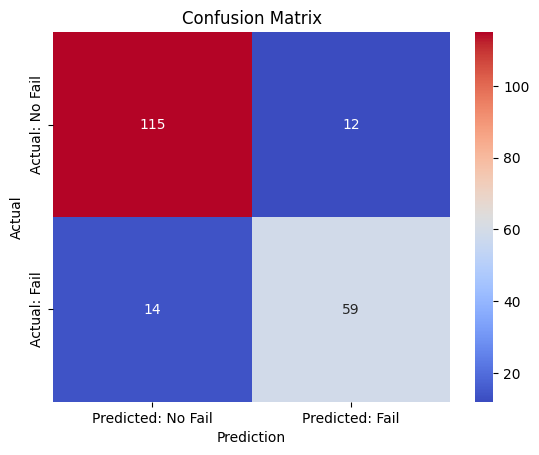

In [ ]:
mat = confusion_matrix(y_test, y_pred)

sns.heatmap(mat, annot=True, fmt="d", cmap="coolwarm",
            xticklabels=['Predicted: No Fail', 'Predicted: Fail'],
            yticklabels=['Actual: No Fail', 'Actual: Fail'])
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## **Accuracy Test**

In [ ]:
accuracy_score(y_test,y_pred)

0.87

In [ ]:
(115+59)/(115+59+12+14)

0.87

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
report = pd.DataFrame(report).transpose()
report


,precision,recall,f1-score,support
0,0.891473,0.905512,0.898438,127.00
1,0.830986,0.808219,0.819444,73.00
accuracy,0.870000,0.870000,0.870000,0.87
macro avg,0.861229,0.856865,0.858941,200.00
weighted avg,0.869395,0.870000,0.869605,200.00


## **ROC Curve**

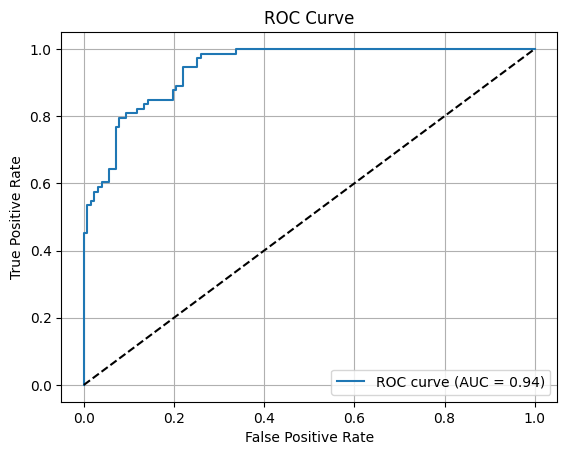

In [ ]:

y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## **Visualization**

### **Feature Importance**

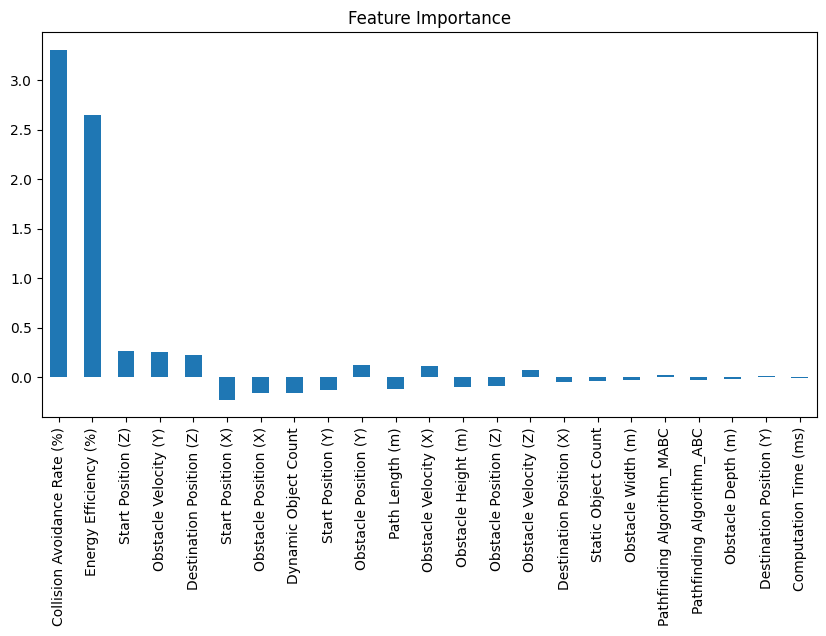

In [ ]:
feature_importance = pd.Series(model.coef_[0], index=X.columns)
feature_importance = feature_importance.sort_values(key=abs, ascending=False)
feature_importance.plot(kind='bar', figsize=(10,5), title='Feature Importance')
plt.show()

### **Correlation Heatmap**

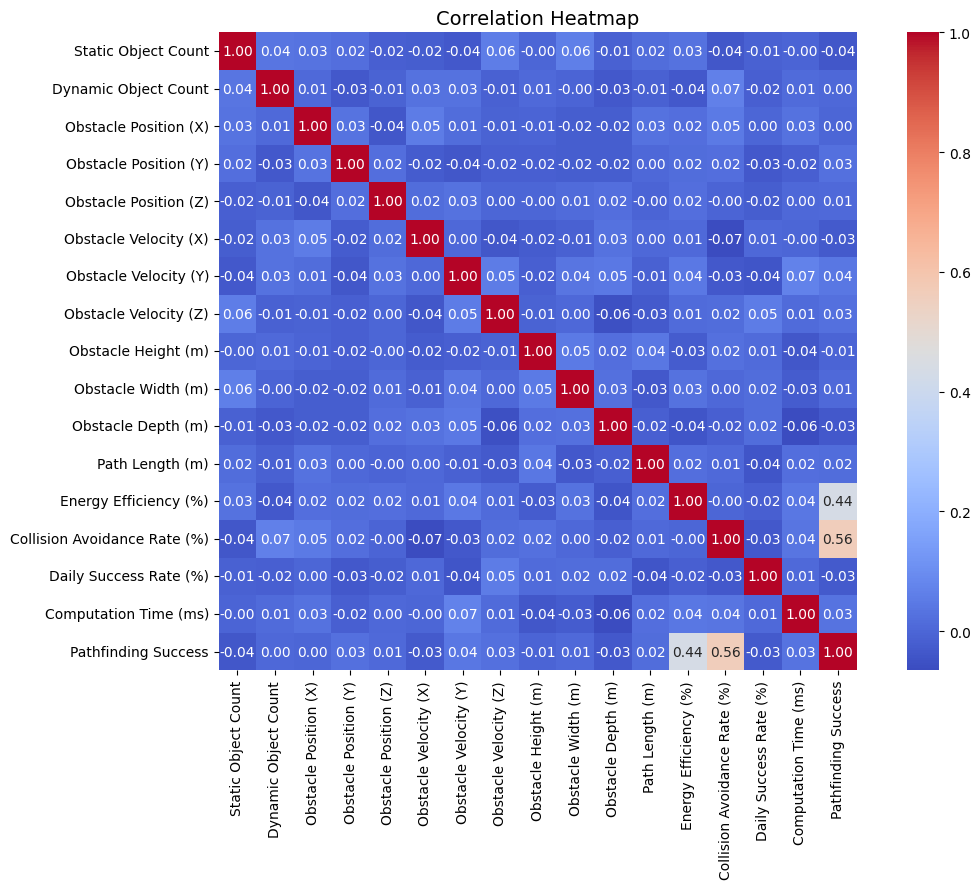

In [ ]:
env_perf_columns = [
    'Static Object Count', 'Dynamic Object Count',
    'Obstacle Position (X)', 'Obstacle Position (Y)', 'Obstacle Position (Z)',
    'Obstacle Velocity (X)', 'Obstacle Velocity (Y)', 'Obstacle Velocity (Z)',
    'Obstacle Height (m)', 'Obstacle Width (m)', 'Obstacle Depth (m)',
    'Path Length (m)', 'Energy Efficiency (%)', 'Collision Avoidance Rate (%)',
    'Daily Success Rate (%)', 'Computation Time (ms)', 'Pathfinding Success'
]

# Compute correlation matrix
corr_matrix = data[env_perf_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()


## **Insights**


*  The model demonstrates strong overall performance, correctly predicting the majority of cases with an accuracy of approximately 87%, indicating reliable classification results. In addition, the AUC value of 0.94 is exceptionally high, showing that the model has an excellent ability to distinguish between successful and unsuccessful robot pathfinding outcomes across various decision thresholds.

* Predicting Class 0 more effectively with higher precision and recall, while performance for Class 1 is slightly lower, indicating greater difficulty in correctly identifying this class

* Collision avoidance rate and energy efficiency strongly influence the model’s predictions, showing consistent effects on pathfinding success and making them the primary predictors in decision-making.

*   To further improve performance, evaluate other models such as Random Forest, Gradient Boosting, or Nueral Network, as these can better capture nonlinear relationships and complex feature interactions.


